# Лабораторная работа 3. Методы ближайшего соседа

# Традиционный 

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [213]:
# Загрузка данных
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [219]:
# Разделение данных на параметры и целевую переменную
x = data[['km', 'years', 'current price', 'condition']].values
y = data['rating'].values

In [220]:
# разделение на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [221]:
k_range = range(1, 11)
scores = {}
scores_list = []
for k in k_range:
    KNN = KNeighborsClassifier()
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

Text(0, 0.5, 'Accuracy')

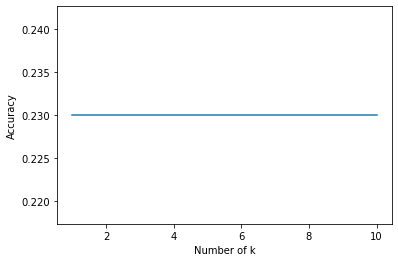

In [222]:
plt.plot(k_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

In [223]:
y_pred[0:30]

array([1, 2, 2, 1, 2, 3, 2, 1, 5, 3, 5, 2, 1, 3, 1, 4, 2, 4, 5, 1, 4, 3,
       2, 4, 1, 3, 4, 1, 2, 3], dtype=int64)

# По радиусу

In [235]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Загрузка данных
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [236]:
# Разделение данных на параметры и целевую переменную
x = data[['km', 'years', 'current price', 'condition']].values
y = data['rating'].values

In [237]:
# разделение на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [238]:
# создание объекта модели
model = RadiusNeighborsClassifier(radius=3, outlier_label = 'most_frequent')

# обучение модели
model.fit(x_train, y_train)

# предсказание классов на тестовой выборке
y_pred = model.predict(x_test)

# оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.22


In [239]:
y_test[0:30]

array([5, 1, 3, 3, 3, 4, 2, 1, 4, 4, 2, 2, 1, 2, 4, 1, 4, 2, 3, 5, 4, 4,
       4, 4, 4, 2, 5, 2, 2, 3], dtype=int64)

In [240]:
print(len(y_pred))

200


In [241]:
y_pred[0:30]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)